# Untangle any waveform

Welcome to a new lesson of the _Engineering Computations_ series, where we use computing as our instrument to discover the world. In this lesson, we explore information in wave form, using sound as a prototypical example. We aim to bring to light how engineers and scientists are able to analyze this kind of data, which has a myriad interesting applications. Let's go!

## What is sound?

Physically, _sound_ can be travelling vibrations in any medium: air, water, a solid, any matter that can support oscillations. When your vocal chords emit sound, they are literally vibrating and passing on that vibration to the air around them. 
When these vibrations reach your ears, they cause the ear drum to vibrate, which is converted into electrical signals that are sent to your brain, and interpreted as sound.

Imagine pressure vibrations in the air like longitudinal waves on a slinky, as shown on this animation (you can watch the full [video](https://www.youtube.com/watch?v=GIkeGBXqWW0) on YouTube).
When a slinky is stretched out and then allowed to freely oscillate, the loops will move back and forth, creating waves of compression and rarefaction that travel along the slinky's length.

![Longitudinal Waves on a Slinky](https://i.makeagif.com/media/5-30-2017/ZChjoc.gif)

_Compression/expansion longitudinal wave on a slinky._

Every loop of the spiral just oscillates around a position of equilibrium, while the _wave_ of compressions and expansions travels along. In the air, sound also travels as longitudinal compression/rarefaction waves.
They are created when a sound source vibrates compressing the air particles around it. As the waves travel through the air, they compress and rarefy air particles, creating areas of high and low pressure.

### Waveforms

A waveform is a schematic, a graphical representation to understand sound waves.
The height of the waveform represents the amplitude of a sound wave, with higher waves indicating louder sounds and lower waves indicating softer sounds. The waveform also visualizes the frequency, or pitch, of a sound. Low-pitched sounds like a bass guitar will have longer, slower waveforms, while high-pitched sounds like a piccolo will have shorter, faster waveforms. Waveforms are used in audio editing software to help visualize and manipulate sounds.
Do explore the interactive guide to [waveforms](https://pudding.cool/2018/02/waveforms/) online: it presents both visually and audibly the concepts of displacement amplitude, wave frequency and more.

A fundamental sound is represented by a _sine wave_. 
When you play on the middle of a piano the note of A, the piano string vibrates at 440 oscillations per second (Hz). That is the _frequency_ of the corresponding sine wave:

$$y(t) = A \sin(2\pi \, f \, t + \theta)$$

where $A$ is the wave amplitude, $f$ the frequency, and $\theta$ is the phase, i.e., the angle value of the sine at $t=0$. The corresponding angular frequency is $~\omega=2\pi f$, in radians per second. 

Let's visualize this function using our favorite Python libraries. We first create a `time` array holding the discrete values of time to evaluate the function at. The array is defined using the length of time from zero to `length_sec` (in seconds) and a _sampling rate_, the number of time samples per second. Study the code below.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rc('font', family='serif', size='14') # set fonts for labels and axes
pyplot.rcParams['text.usetex'] = True # Enable LaTeX rendering

In [2]:
sample_rate = 44100  #Hz
length_sec = 2       #seconds
time = numpy.linspace(0, length_sec, sample_rate * length_sec)  

In [3]:
freq = 440 #Hz
y = numpy.sin(2 * numpy.pi * freq * time) 

The sampling rate used above, [44100 Hz](https://en.wikipedia.org/wiki/44,100_Hz) (44.1 kHz), is the standard value for digital audio recordings going back to the 1970s. It is the sampling rate used in CDs, and in .mp3 audio files. 

A fundamental theorem in the field of digital signal processing states that to capture all the information of a continuous signal, the sampling rate needs to be more than twice the maximum frequency. It is the **Nyquist–Shannon sampling theorem**. Since our ears can perceive sound in a frequency range of 20–20,000 Hz (20 kHz), industry chose 44.1 kHz for digital audio: just a little over double the maximum frequency we can hear. 

Let's look at our sine waveform for the A4 note (that is the note of A in the middle of a piano):

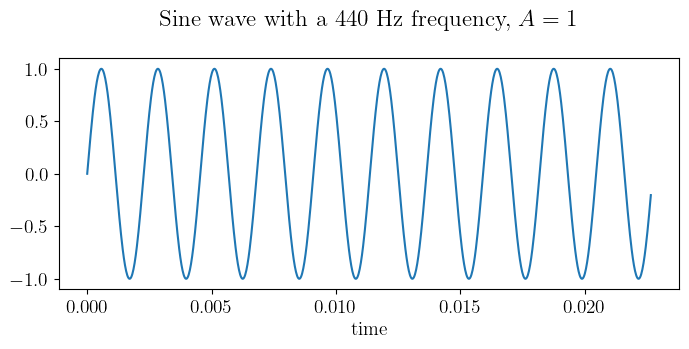

In [4]:
pyplot.figure(figsize=(8,3))
pyplot.plot(time[:1000], y[:1000])
pyplot.xlabel('time')
pyplot.title('Sine wave with a 440 Hz frequency, $A=1$\n');

## Play with audio in Python

We can _play_ the sound from our sine waveform using the [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) module, which provides a simple interface for displaying audio in a Jupyter notebook. It can load and play audio files, or create and play synthetic audio waveforms. Check out the documentation for details. 

You can use the `Audio` function in the `IPython.display` module to create an audio object. When you use a NumPy array as the data, it needs the argument `rate` corresponding to the sampling rate.

In [5]:
from IPython.display import Audio

In [6]:
Audio(y, rate=sample_rate)

Isn't that cool? Let's now write a custom function that takes as arguments the frequency, duration of sound (and an optional phase angle) and it returns the time array and the signal, using 44.1 kHz as the sampling rate.

In [7]:
def sine_signal(frequency, duration, phase=0):
    '''Computes a sine signal of given frquency and duration
    using a sample rate of 44.1kHz, and returns it along with 
    the time array
    
    Arguments:
    ----------
    frequency: float, in Hz
    duration: float, duration of the audio in seconds
    phase: float, optional phase in radians 
    
    Returns:
    --------
    wave: array, sinusoidal wave of given frequency
    time: array, time samples
    
    '''
    samp_rate = 44100 #Hz
    time = numpy.linspace(0, duration, samp_rate * duration)  
    
    wave = numpy.sin(2 * numpy.pi * frequency * time + phase)
    
    return wave, time

Let's create two sine waves of 2-second duration with frequencies of 440 Hz and 294 Hz, corresponding to the notes A4 and D4 on the piano, and save them to Python variables. On the second line, we save only the signal using the index `[0]`. 

In [8]:
A440, t2 = sine_signal(frequency=440, duration=2)
D294 = sine_signal(frequency=294, duration=2)[0] 

Now let's play the sound for the D note alone, and for the sum of the two notes. We can do this because the two signals have the same length and sampling rate. Then we will plot the different waveforms.

In [9]:
Audio(D294, rate=sample_rate)

In [10]:
Audio(D294+A440, rate=sample_rate)

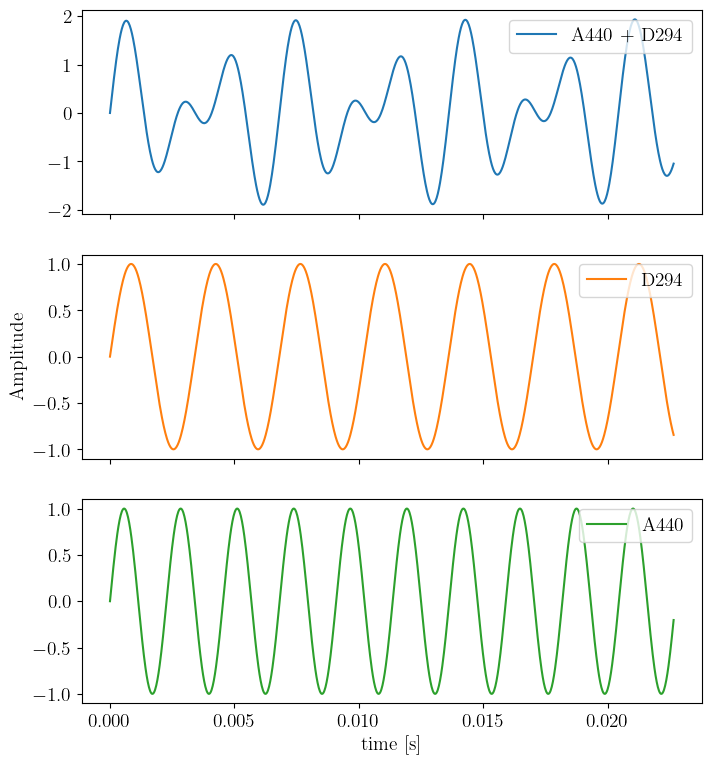

In [11]:
f, (ax1, ax2, ax3) = pyplot.subplots(3, 1, sharex=True, figsize=(8.0, 9.0))

ax1.plot(t2[:1000], (A440+D294)[:1000], c='C0', label='A440 + D294')

ax2.plot(t2[:1000], D294[:1000], c='C1', label='D294')
ax2.set_ylabel('Amplitude')

ax3.plot(t2[:1000], A440[:1000], c='C2', label='A440')

ax3.set_xlabel('time [s]')

#plot all legends in one line
[ax.legend(loc='upper right') for ax in (ax1, ax2, ax3)];

_Exercise:_

- Create two new sound waves of 2-second duration and frequencies of 349Hz and 523Hz, and name them F349 and C523, respectively. 
- Create the audio widget to play the sound that results from the sum of all the frequencies we have created.
- Plot all the sound waves and their sum in aplot like the one above.

### Read and write audio files

The SciPy library has many modules to read and write data in various file formats. To handle [WAV files](https://en.wikipedia.org/wiki/WAV), those written in the Waveform Audio File Format, we can use the `scipy.io.wavfile` module. After importing it, let's save the waveform data we have created into a file; notice the arguments we have passed to the [`wavfile.write()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html#scipy.io.wavfile.write) function and take a look at the documentation page.

In [12]:
from scipy.io import wavfile

sum_waves = A440 + D294

wavfile.write('sum_AD.wav', sample_rate, sum_waves) #name of file, sample rate, array

You can also read a WAV file, listen to it, and later analyze it or modify the data. Here, we download a WAV file with the tones of a C chord on a guitar (added in progression), and then use [`wavfile.read()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read)  to read the sound waveform, and to save it to a Python variable.
(C chord WAV data file from Ref. [2].)

In [13]:
URL = 'https://matthewmcgonagle.github.io/assets/2018-01-05-output/cchord.wav'
from urllib.request import urlretrieve
urlretrieve(URL, 'cchord.wav')

('cchord.wav', <http.client.HTTPMessage at 0x7f360fa90150>)

In [14]:
wavfile.read('cchord.wav')

(7900, array([ 6219,  7842,  9394, ..., 10862, 12070, 13026], dtype=int16))

Notice the return value of `wavfile.read()`: it is a tuple containing an integer, and an array. The first component is the sampling rate of this WAV file, and the second component is the data as a NumPy array. To play with them, we save them to Python variables.

In [15]:
cchord_rate, cchord = wavfile.read('cchord.wav')

In [16]:
Audio(cchord, rate=cchord_rate)

The values of time corresponding to the signal samples are computed using the integers from zero to the length of the data array, divided by the sampling rate. Let's create a time array for this signal, then plot the signal.

In [17]:
ctimes = numpy.arange(len(cchord)) / cchord_rate

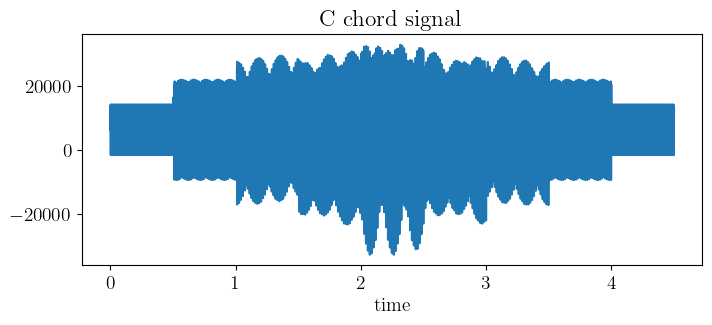

In [18]:
pyplot.figure(figsize=(8,3))
pyplot.plot(ctimes, cchord)
pyplot.xlabel('time')
pyplot.title('C chord signal');

Interesting! But hard to make out what is going on there. What if you wanted to know the frequencies of the tones that make up this audio sample? _How might you untangle this waveform into its component sine waves?_

## Understanding the Fourier transform

The answer to the question above is _the Fourier transform_. Once again, we benefit from a wonderfully visual explanation by Grant Sanderson [3]. We highly recommend that you watch the [video](https://www.youtube.com/watch?v=spUNpyF58BY)! The rest of this lesson is based on it. 

A key idea of the Fourier transform is that it mathematically treats each frequency component in a signal _differently_, so that it can identify them and show us what they are. 

We will follow Ref. [3] closely. Let us start with a 2-second-long sine wave that is shifted by $\pi/2$ (i.e., it's the cosine wave), with a 3-Hz frequency. Create it with our custom function, then plot it. 

In [19]:
sinewave, time = sine_signal(frequency=3, duration=2, phase=numpy.pi/2)

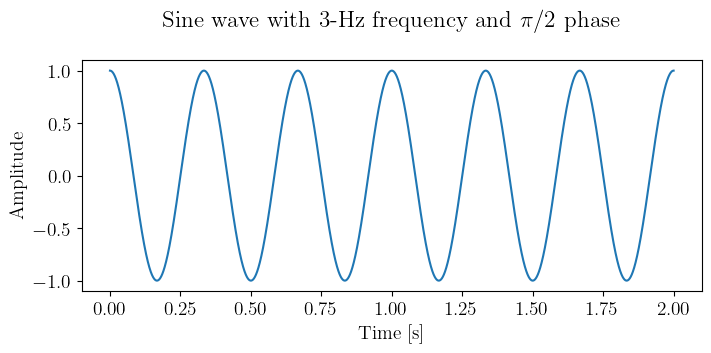

In [20]:
pyplot.figure(figsize=(8,3))
pyplot.plot(time, sinewave)
pyplot.xlabel('Time [s]')
pyplot.ylabel('Amplitude')
pyplot.title('Sine wave with 3-Hz frequency and $\pi/2$ phase\n');

Now, complex numbers to the rescue! In [Lesson 0](https://go.gwu.edu/engcomp5lesson0) of this module, we reviewed complex numbers, played with them using Python, and learned about their geometry. 

Imagine that our signal corresponds to the modulus of a complex number, while the time maps to its phase angle—it's like taking the horizontal time axis and wrapping it around a circle on the complex plane. 

Remember that Euler's formula says that the exponential of $i\alpha$ lands on the complex number $(\cos\alpha, \sin\alpha)$ on the unit circle. We use a frequency value to define complex numbers with $\alpha = -2\pi i f t$—that is, as time moves forward, we rotate clockwise on the complex plane.

In the function below, we define a unit circle from a given frequency and time samples. In the next cell, we call it with a frequency of $1$ (corresponding to an angular frequency of $2\pi$ radians per second) and the `time` array, and plot the result.

In [21]:
def comp_fourier_term(f, t):
    
    circ = numpy.exp(-2*numpy.pi*1j*f*t)
    
    return circ

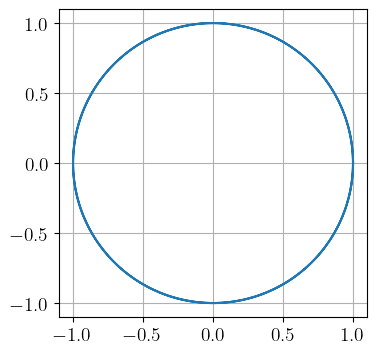

In [22]:
wrap = comp_fourier_term(1, time)

pyplot.figure(figsize=(4, 4))
pyplot.plot(wrap.real, wrap.imag)
pyplot.axis('scaled')
pyplot.axis([-1.1,1.1,-1.1,1.1])
pyplot.grid(True);

That took the `time` array and mapped it onto the unit circle on the complex plane. 

Next, we _multiply_ each discrete value of our sine waveform with the corresponding complex number that maps time to the unit circle.
This is like winding our signal around the origin. The resulting curve passes through the complex numbers whose modulus is equal to the amplitude and whose phase is equal to $\alpha = -2\pi i f t$ for our signal.

By calling the function `comp_fourier_term()` with the argument `f=1`, we wrapped time around the unit circle once. But we can change this "winding" frequency to any value we want, and it will change how the signal is mapped onto the complex plane.

We are now dealing with two frequencies: that of the original sine waveform, and that of the winding of that signal around the unit circle on the complex plane.

Come on, try this with several values of `f`!

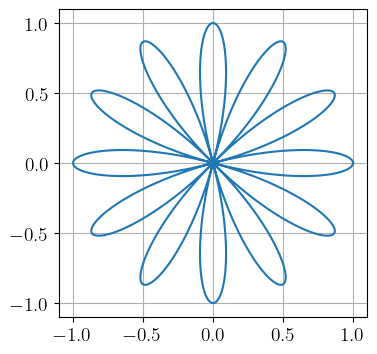

In [23]:
wrap_sine = sinewave * comp_fourier_term(f=0.5, t=time)

pyplot.figure(figsize=(4, 4))
pyplot.plot(wrap_sine.real, wrap_sine.imag)
pyplot.axis('scaled')
pyplot.axis([-1.1,1.1,-1.1,1.1])
pyplot.grid(True);

If you experimented with lots of values of the winding frequency, you were probably amused by the pretty pictures, but our toy is also a powerful means for understanding the Fourier transform.

For now, consider just the real part of the wound-up signal, and look at the *mean value* for all sampled times, for a given winding frequency. This mean value tends to be small, as the plots show that the wound-up signal is often symmetric around the origin. But for some winding frequency, things change... 

Let's explore. With a winding frequency of 0.5 the mean value of the real part is nearly zero. But let's re-compute the wound-up signal for an array of frequency values, and get the mean of the real parts, each time.
We choose 200 values of winding frequency, between 1 and 5, compute the wound-up signal with each one, then take the mean of the real parts of the resulting complex numbers, and save that in an array. Plotting this information is... interesting!

In [24]:
numpy.mean(wrap_sine.real)

1.1337868480730779e-05

In [25]:
# Winding frequencies
freqs = numpy.arange(1, 5, 0.02)
len(freqs)

200

In [26]:
xmean = []
for i in range(len(freqs)):
    
    wrap = sinewave * comp_fourier_term(f=freqs[i], t=time)
    xmean.append(numpy.mean(wrap.real))

xmean = numpy.array(xmean)

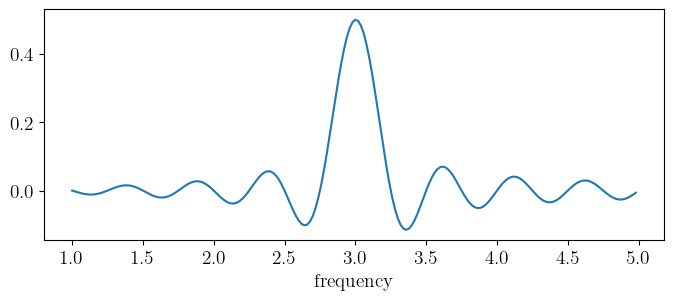

In [27]:
pyplot.figure(figsize=(8,3))
pyplot.plot(freqs, xmean)
pyplot.xlabel('frequency');

Starting with our sine wave, winding it around the unit circle on the complex planes at different frequencies, and computing the mean of the real parts of the resulting complex numbers—this transformed data—reveals the _frequency of the original signal_.

Why is there a marked peak on this data at just the winding frequency that matches the signal frequency?
We have a "helper" Python script that makes an animation with Matplotlib of the changing wound-up signal on the complex plane, and the plot of the transformed data with respect to frequency. This is not quite the Fourier transform, but it's pretty close. Grant Sanderson calls it "almost Fourier" transform [3], and so do we.

Here, we load Matplotlib's `animation` module, and our helper script. In the next cell, we call our helper function `create_animation()` using a coarser set of frequency values, to make things a little faster.

In [28]:
from matplotlib import animation

# import helper to produce animation, assuming it is in the scripts folder
import sys
sys.path.append('../scripts/')

import almost_fourier_helper as afh

In [29]:
# This cell will take few seconds to run
# We use fewer frequencies otherwise the animation is too slow
freqs_coarse = numpy.arange(1, 5, 0.06)

afh.create_animation(sinewave, time, freqs_coarse)

Watch the animation and ponder how this "frequency detection machine" works: multiplying the signal amplitude by the complex number $e^{i\alpha}$, where $\alpha=-2\pi i f t$, with different values of $f$. This transforms the signal to a curve on the complex plane that for most frequencies has some symmetry, so the real parts average to near zero. 
Except as it approaches the frequency of the signal, when things line up just right and the curve on the complex plane averages a positive real part, revealing a peak at the signal frequency.
It's startling!

We can try again with the sum of two sine waveforms, say, with frequencies of 2 and 4 Hz, and see what happens now.

In [30]:
sinewave_1, time = sine_signal(frequency=2, duration=2, phase=numpy.pi/2)
sinewave_2, time = sine_signal(frequency=4, duration=2, phase=numpy.pi/2)

xmean = []
for i in range(len(freqs)):
    
    wrap = (sinewave_1+sinewave_2) * comp_fourier_term(f=freqs[i], t=time)
    xmean.append(numpy.mean(wrap.real))
    
xmean = numpy.array(xmean)

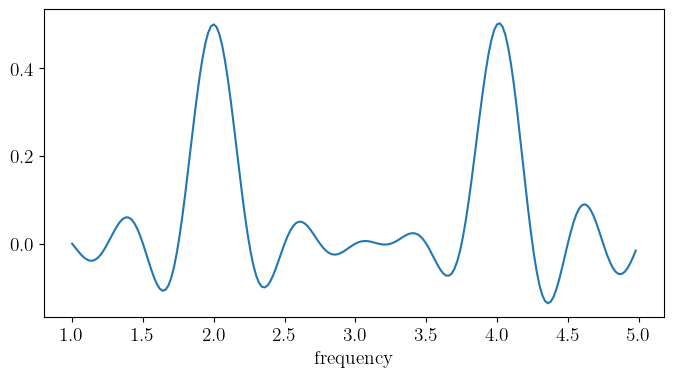

In [31]:
pyplot.figure(figsize=(8,4))
pyplot.plot(freqs, xmean)
pyplot.xlabel('frequency');

In [32]:
#we need to normalize to have Amplitude max =1 and fit in the circle
afh.create_animation((sinewave_1 + sinewave_2)/max(sinewave_1 + sinewave_2), time, freqs_coarse)

Indeed, we see two frequency peaks: at 2 and 4 Hz.

Our final test will use the data corresponding to a guitar C chord, saved above from a WAV file into the variables `cchord` and `ctimes`. To know what frequency range we need to explore, we used a [table of the frequencies in Hz for musical pitches](https://www.seventhstring.com/resources/notefrequencies.html). It seems for the first 5 octaves, the frequencies are in the range from 15 to 1000 Hz.

In [33]:
freqs = numpy.arange(15, 1000, 5)
len(freqs)

197

In [34]:
xmean = []
for i in range(len(freqs)):
    
    wrap = cchord * comp_fourier_term(f=freqs[i], t=ctimes)
    xmean.append(numpy.mean(wrap.real))

xmean = numpy.array(xmean)

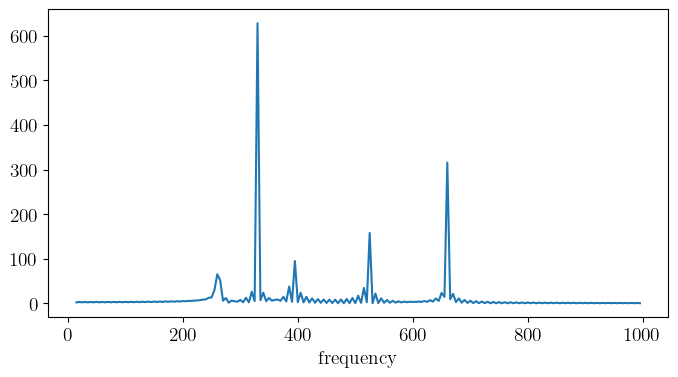

In [35]:
pyplot.figure(figsize=(8,4))
pyplot.plot(freqs, abs(xmean))
pyplot.xlabel('frequency');

From Ref. [2], we know the frequencies used to generate the audio file were `[261.6, 329.6, 392.0, 523.3, 659.3]`, which from the table of frequencies correspond to C4, E4, G4, C5 and E5. Those frequencies look pretty close to the peaks seen in the plot above, if you squint!

That is how the Fourier transform works, in broad strokes. In this exploration, we looked at the real part only, and we took its mean value for the wound-up signal around a circle in the complex plane. 

We have also worked with discrete signals throught this lesson. Sound is made up of _continuous waves_, but we always need to turn that into discrete values to store it digitally.

The Fourier transform takes a time-dependent signal $g(t)$ and computes:

$$\begin{equation}
     \hat{g}(f) = \int_{t_1}^{t_2} g(t) e^{-2\pi i f t} dt
\end{equation}
$$

This has real and imaginary parts, but we only looked at the real part. It is an integral—meaning, an infinite sum—while we looked at a mean value, which is a sum of discrete terms, divided by the number of terms. So we got close, but not quite. It is remarkable that the power of the transform is still obvious even in this "almost" Fourier transform.

*End note:*

> The Fourier transform converts information in the time domain to the frequency domain, but nothing is lost. In fact, you can recover a signal from its Fourier transform, using the _inverse_ Fourier transform.

## What we've learned

- Sound is traveling vibrations in any medium.
- Waveforms help us understand sound: a fundamental sound is a sine wave.
- We can play with sound in Python using `IPython.display.Audio`.
- Add multiple waves to get a combined waveform.
- To untangle a complicated waveform into its component frequencies, we use the Fourier transform.
- The principle of Fourier transforms can be explained by:
  - take a signal's waveform, map it to the modulus of a complex number
  - time maps to the phase angle via $\alpha=-2\pi i f_w t$
  - it's like winding the signal around the unit circle, where $f_w$ is a winding frequency
  - test with a range of $f_w$ values, compute the average of the real parts of the wound-up signal on the complex plane
  - when the winding frequency matches the signal frequency, you see a peak
  - it's a frequency detection machine!

## References

1. Josh Comeau (n.d.), [Waveforms](https://pudding.cool/2018/02/waveforms/), an interactive and visual guide.
2. Matthew McGonagle (2018), [Making an Audio .wav File of Cantor Tones](https://matthewmcgonagle.github.io/blog/2018/01/05/CantorTones), blog post.
3. Grant Sanderson (2018), [But what is the Fourier Transform? A visual introduction](https://www.youtube.com/watch?v=spUNpyF58BY), video on YouTube.

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../../styles/custom.css'
HTML(open(css_file, "r").read())